## import packages

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from func import freq_dis, validate_date_month_day

In [28]:
def validate_date_year(d):
    '''validate date for analysis. check for dates that are more than 100 year old and to find outlines.'''
    invalide_dates = {}
    for i in list(d):
        if i and len(i) > 0:
            if  i.split('-')[0] in invalide_dates.keys():
                invalide_dates[i.split('-')[0]] += 1
            else:
                invalide_dates[i.split('-')[0]] = 1
    return invalide_dates

## load dataset from provided file, in the correct excel sheet

In [2]:
df = pd.read_excel("./KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="Transactions", header=1)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


unique: 100
null values: 197

describe:
count    19803.000000
mean     38199.776549
std       2875.201110
min      33259.000000
25%      35667.000000
50%      38216.000000
75%      40672.000000
max      42710.000000
Name: product_first_sold_date, dtype: float64


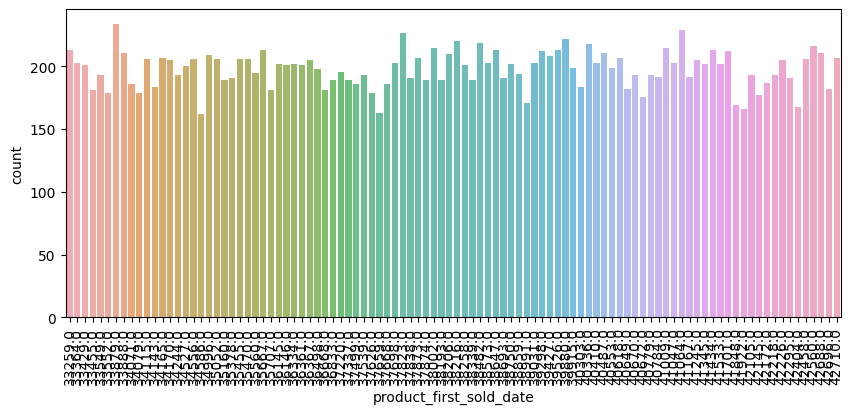

In [61]:
# check product_first_sold_date
product_first_sold_date = df['product_first_sold_date']
print(f"unique: { product_first_sold_date.nunique() }")
print(f"null values: { product_first_sold_date.isna().sum() }")
print(f"\ndescribe:\n{ product_first_sold_date.describe() }")

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="product_first_sold_date", alpha=0.8,)
plt.xticks(rotation=90, va='top')
plt.show()

unique: 103
null values: 197

describe:
count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64


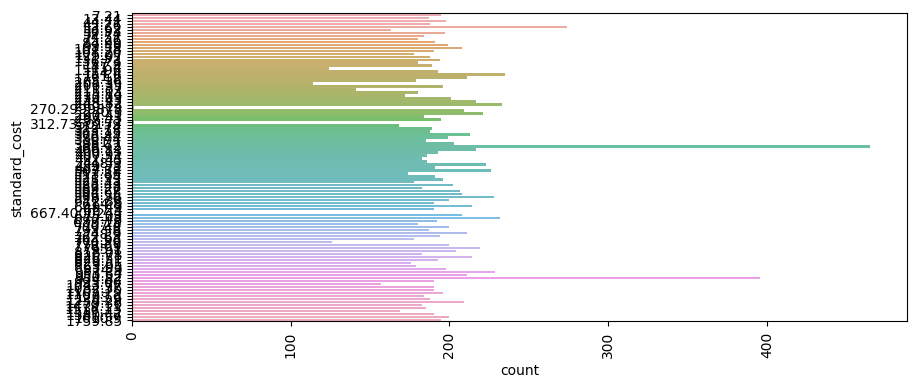

In [59]:
# check standard_cost
standard_cost = df['standard_cost']
print(f"unique: { standard_cost.nunique() }")
print(f"null values: { standard_cost.isna().sum() }")
print(f"\ndescribe:\n{ standard_cost.describe() }")

plt.figure(figsize=(10,4))
sns.countplot(data=df, y="standard_cost", alpha=0.8,)
plt.xticks(rotation=90, va='top')
plt.show()

unique: 296
null values: 0

describe:
count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64


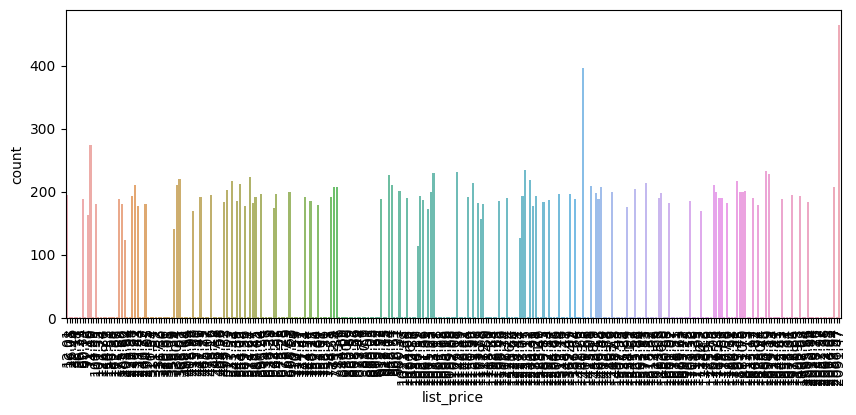

In [57]:
# check list_price
list_price = df['list_price']
print(f"unique: { list_price.nunique() }")
print(f"null values: { list_price.isna().sum() }")
print(f"\ndescribe:\n{ list_price.describe() }")

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="list_price", alpha=0.8,)
plt.xticks(rotation=90, va='top')
plt.show()

In [40]:
# check product_size
product_size = df['product_size']
print(f"unique: { product_size.unique() }")
print(f"distribution: { freq_dis(product_size) }")
print(f"\ndescribe:\n{ product_size.describe() }")

unique: ['medium' 'large' 'small' nan]
distribution: {nan: 197, 'small': 2837, 'large': 3976, 'medium': 12990}

describe:
count      19803
unique         3
top       medium
freq       12990
Name: product_size, dtype: object


In [39]:
# check product_class
product_class = df['product_class']
print(f"unique: { product_class.unique() }")
print(f"distribution: { freq_dis(product_class) }")
print(f"\ndescribe:\n{ product_class.describe() }")

unique: ['medium' 'low' 'high' nan]
distribution: {nan: 197, 'low': 2964, 'high': 3013, 'medium': 13826}

describe:
count      19803
unique         3
top       medium
freq       13826
Name: product_class, dtype: object


In [38]:
# check product_line
product_line = df['product_line']
print(f"unique: { product_line.unique() }")
print(f"distribution: { freq_dis(product_line) }")
print(f"\ndescribe:\n{ product_line.describe() }")

unique: ['Standard' 'Road' 'Mountain' 'Touring' nan]
distribution: {nan: 197, 'Mountain': 423, 'Touring': 1234, 'Road': 3970, 'Standard': 14176}

describe:
count        19803
unique           4
top       Standard
freq         14176
Name: product_line, dtype: object


In [37]:
# check brand
brand = df['brand']
print(f"unique: { brand.unique() }")
print(f"distribution: { freq_dis(brand) }")
print(f"\ndescribe:\n{ brand.describe() }")

unique: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
distribution: {nan: 197, 'Norco Bicycles': 2910, 'Trek Bicycles': 2990, 'OHM Cycles': 3043, 'WeareA2B': 3295, 'Giant Bicycles': 3312, 'Solex': 4253}

describe:
count     19803
unique        6
top       Solex
freq       4253
Name: brand, dtype: object


In [33]:
# check order_status
order_status = df['order_status']
print(f"unqiue: {order_status.unique()}")
print(f"distribution: {freq_dis(order_status)}")
print(f"\ndescribe:\n{order_status.describe()}")

unqiue: ['Approved' 'Cancelled']
distribution: {'Cancelled': 179, 'Approved': 19821}

describe:
count        20000
unique           2
top       Approved
freq         19821
Name: order_status, dtype: object


In [30]:
# check online_order feature.
online_order = df['online_order']
print(f"unique: {online_order.unique()}")
print(f"\nfreq distribution:\n{freq_dis(online_order)}")
print(f"\ndescribe:\n{online_order.describe()}")

unique: [False True nan]

freq distribution:
{nan: 360, False: 9811, True: 9829}

describe:
count     19640
unique        2
top        True
freq       9829
Name: online_order, dtype: object


In [23]:
# data transaction_date
date_ = df['transaction_date']
print(f"shape: {date_.shape}")
print(f"unique values count: {date_.nunique()}")
d_ = date_.dt.date.apply( lambda x : x.strftime("%Y-%m-%d") if not pd.isna(x) else '' )
print( f"unique years: {validate_date_year(d_)}" )
print( f"unique days: {validate_date_month_day(d_)}" )
print(f"\ndescription:\n{date_.describe()}")


shape: (20000,)
unique values count: 364
unique years: {'2017': 20000}
unique days: {}

description:
count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object


/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_41206/1874271064.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f"\ndescription:\n{date_.describe()}")


## check for missing values in the columns.

In [5]:
# identify missing values columns.
# df.isna().sum()
df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

## Identify outliers in the data

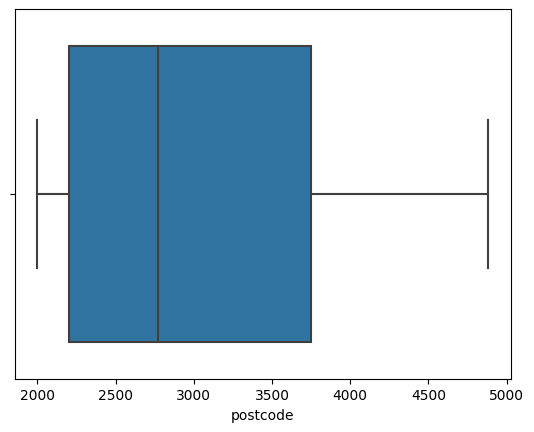

In [21]:
# check for outliers.
sns.boxplot(data=df, x="postcode", flierprops={"marker": "x"})
# df.boxplot(column="postcode") # postcode, property_valuation
plt.show()

## validate data types

In [22]:
df.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

## check for duplicate rows.

In [27]:
# from the result, there are no duplicate data samples.
df[df.duplicated()]
# df[df.duplicated(['customer_id'])]

,customer_id,address,postcode,state,country,property_valuation


## check data ranges

In [28]:
# use describe method to check for data range. will only check numerical values.
df.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


## check for consistency.

In [29]:
df.value_counts()

customer_id  address                    postcode  state            country    property_valuation
1            060 Morning Avenue         2016      New South Wales  Australia  10                    1
2676         1411 Jenifer Center        4670      QLD              Australia  3                     1
2663         1 Ronald Regan Hill        2756      NSW              Australia  8                     1
2664         359 Briar Crest Road       2155      NSW              Australia  10                    1
2665         4543 Service Terrace       2566      NSW              Australia  8                     1
                                                                                                   ..
1343         09 Hagan Pass              3196      VIC              Australia  8                     1
1344         87897 Lighthouse Bay Pass  3747      VIC              Australia  4                     1
1345         294 Lawn Junction          3677      VIC              Australia  1        

In [30]:
df.corr()

/var/folders/0r/13xz5g6j45589319bn94k47w0000gn/T/ipykernel_37443/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,postcode,property_valuation
customer_id,1.000000,0.011396,-0.012073
postcode,0.011396,1.000000,-0.508392
property_valuation,-0.012073,-0.508392,1.000000
